# Image seam carving

Inspired  from the last assignment in <a href="http://cs.brown.edu/courses/cs019/2014/assignments.html">Brown cs019</a> illustrating compressing an image width.

This notebook is organized into eight  parts:
1. Get images
2. Brightness
3. Energy
4. Least Energy
5. Get and Display Seam
6. Carve Seam
7. Examples
8. Opportunities to Extend

## Get images

May take 30 secondsish...

,,,

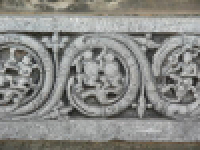
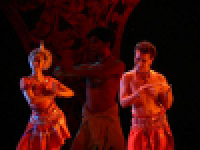
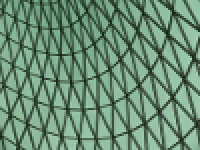
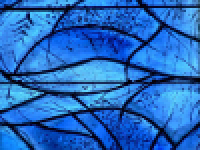

In [1]:
#Pkg.add("Images")
using Images

filenames = ["belur-carving", "bangalore-dancers", "british-museum","mainz-chagall-fenster"];


# wget images from Brown if not present
for file in filenames
  if !isfile("$file.jpg")
    download("http://cs.brown.edu/courses/cs019/2014/Assignments/Fluid-Images/$file-s2.jpg","$file.jpg");
  end
end

[load("$file.jpg") for file in filenames]
# Belur        Bangalore     British      Chagall

In [2]:
# Pkg.add("ImageMagick")

Let's show off manipulate just because everyone likes it:

Interact.Options{:ToggleButtons,String}(1: "input" = belur-carving String , "file", "belur-carving", "belur-carving", Interact.OptionDict(DataStructures.OrderedDict("belur-carving"=>"belur-carving","bangalore-dancers"=>"bangalore-dancers","british-museum"=>"british-museum","mainz-chagall-fenster"=>"mainz-chagall-fenster"), Dict("british-museum"=>"british-museum","belur-carving"=>"belur-carving","bangalore-dancers"=>"bangalore-dancers","mainz-chagall-fenster"=>"mainz-chagall-fenster")), Any[], Any[], true, "horizontal")

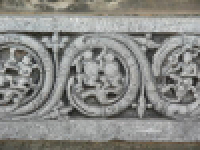

In [3]:
using Interact

@manipulate for file in filenames
    load("$file.jpg")
end

Let's see the size of the image:

In [4]:
img = load("bangalore-dancers.jpg")
size(img)

(75, 100)

## Brightness

In [5]:
# brightness of a color is the sum of the r,g,b values (stored as float32's)
brightness(c::AbstractRGB) = (c.r + c.g + c.b)

# brightness of an image bordered with zeros
function brightness(I::Array{<:AbstractRGB})
    h, w = size(I)
    b = brightness.(I)
    # borders
    zh = fill(0f0,   1, w)  # horizontal zero 
    zv = fill(0f0, h+2, 1)  # vertical zero 
    [zv [zh; b; zh] zv] 
 end
# has 2 more rows and 2 more cols

brightness (generic function with 2 methods)

## Energy

In [6]:
M = rand(10, 10)
@view M[3:5, 3:5]

3×3 SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}:
 0.584373  0.987351  0.389961
 0.422484  0.302648  0.635981
 0.322529  0.884909  0.670407

In [7]:
# the 3x3 stencil for energy
function stencil(b)
    x_energy = b[1,1] + 2b[2,1] + b[3,1] - b[1,3] - 2b[2,3] - b[3,3]
    y_energy = b[1,1] + 2b[1,2] + b[1,3] - b[3,1] - 2b[3,2] - b[3,3]
    sqrt(x_energy^2 + y_energy^2)
end

# energy of an array of brightness values 
# input: assumed zero borders
# output: left and right set to ∞
function energy(b)
    h, w = size(b)
   #@time e = [float32(stencil( @view b[y-1:y+1, x-1:x+1] )) for y=2:h-1,x=2:w-1]
    e = zeros(Float32,h-2,w-2)
    for y=2:h-1,x=2:w-1
        e[y-1,x-1] = stencil( @view b[y-1:y+1, x-1:x+1] )
    end
    
    infcol = fill(Inf64, h-2, 1)
    hcat(infcol, e, infcol)
end

energy (generic function with 1 method)

## Find Least-Energy Vertical Seam

And now, some dynamic programming to find the minimal-energy vertical seam...

In [8]:
#  e (row                  e[x,y] 
#  dirs:                ↙   ↓   ↘       <--directions naturally live between the rows
#  e (row y+1): e[x-1,y+1] e[x,y+1]  e[x+1,y+1]     
# Basic Comp:   e[x,y] += min( e[x-1,y+1],e[x,y],e[x+1,y])
#               dirs records which one from (1==SW,2==S,3==SE)

# Take an array of energies and work up from
# bottom to top accumulating least energy down



function least_energy(e)
# individual energies go in
# cumulative energies and directions come out
    
    h, w = size(e)
    dirs = zeros(UInt8, h-1, w-2)
       # w-2 because we don't need the infs
       # h-1 because arrows are between rows
     
    for y = h-1:-1:1, x = 2:w-1 
          
        # s, dirs[y,x-1] = findmin(e[y+1,x.+[-1, 0, 1]]) # findmin gets the min and the index
       # s, dirs[y, x-1] = findmin(@view e[y+1,x-1:x+1]) 
        a = e[y+1,x-1]
        b = e[y+1,x]
        c = e[y+1,x+1]
        
        if  (a<b)
            if (a<c)
              e[y,x] += a
              dirs[y,x-1] = 1
            else
               e[y,x] += c
               dirs[y,x-1] =3
            end
        else
            if (b<c)
              e[y,x] += b  
              dirs[y,x-1] = 2
            else
               e[y,x] += c
               dirs[y,x-1] =3
            end 
        end
        
        
        
        
        
        #e[y,x] += s   #  add in current energy +  smallest from below
     
    end
    
    (@view e[1,2:w-1]), dirs  # return top row without infinities and dirs
end

least_energy (generic function with 1 method)

## Display Seams

In [9]:
function get_seam(dirs,x)
    seam = fill(0,1+size(dirs,1))
    seam[1] = x
     for y = 1:size(dirs,1)
        seam[y+1] = seam[y] + dirs[y,seam[y]] - 2
        
    end
    return seam
end

using Colors

function mark_seam(img, seam, color=RGB(1,1,1))
    img2 = copy(img)
     for y = 1:(length(seam)-1)        
        img2[y, seam[y]]=color
    end
    img2
end

function manipulate_seam(url::String)
    fn = split(url, "/")[end]
    
    if !isfile(fn)
        download(url,fn)
    end
    
    img = load(fn)
    _, dirs  = least_energy(energy(brightness(img)))
    
    @manipulate for x = 1:size(img, 2)
        mark_seam(img, get_seam(dirs, x))
    end
end

manipulate_seam (generic function with 1 method)

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 332 Int64 , "x", 332, "332", Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(306=>"306",29=>"29",74=>"74",176=>"176",285=>"285",318=>"318",354=>"354",610=>"610",563=>"563",117=>"117"…)), Any[], Any[], true, "horizontal")

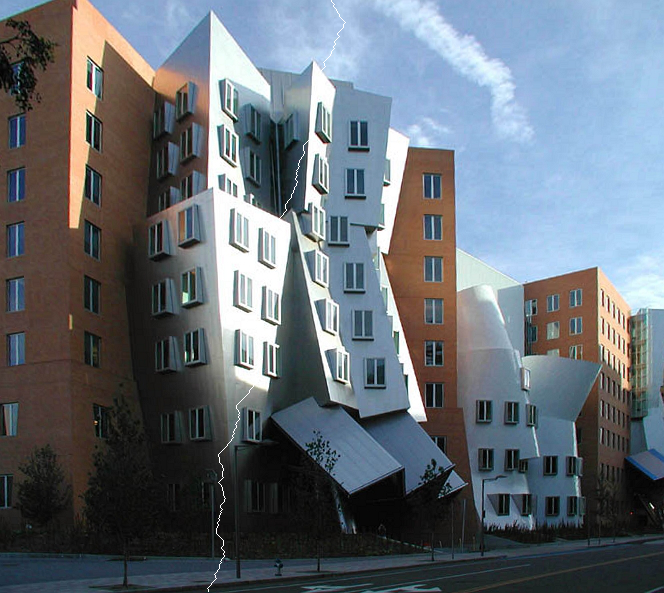

In [10]:
# put your favorite image url here

# Stata size=(664,593)
manipulate_seam("http://upload.wikimedia.org/wikipedia/commons/2/25/Wfm_stata_center.jpg")
# Yosemite size=(4288,2848)
# manipulate_seam("http://upload.wikimedia.org/wikipedia/commons/e/ec/1_yosemite_valley_tunnel_view_2010.JPG")

# manipulate_seam("http://www.nssl.noaa.gov/education/svrwx101/lightning/img/Lightning_hits_tree.jpg")

## Carve Seam

In [11]:
"Run across top row. Find energy of each lightning bolt and calculate the minimum.
Return the corresponding seam (locations to remove).
"
function minseam(img)
   b = brightness(img)
    e1 = energy(b)
    e, dirs = least_energy(e1)
    #e, dirs = least_energy(energy(brightness(img)))
    x = indmin(e)
    seam = get_seam(dirs, x)
end
    
"Delete one pixel on each line"
function carve(img, seam)
    h, w = size(img)
    newimg = img[:,1:w-1]         # one pixel less wide

     for y = 1:h
        s = seam[y]
        #newimg[y,:] = @view img[y, [1:s-1; s+1:size(img,2)] ] # delete pixel x=s on row y
        newimg[y, 1:s-1] .= @view img[y, 1:s-1]
        newimg[y, s:end] .= @view img[y, s+1:end]
    end
    
    newimg
 end
    
carve(img) = carve(img, minseam(img))  

function carve(img, n::Int)
    img2 = copy(img)
    
      for i=1:n
        img2 = carve(img2)
     end
    
     img2
end

carve (generic function with 3 methods)

## 7. Examples

In [12]:
# This is a utility function (you do not need to understand it) 
# which overrides Ijulia's image widget so that manipulate displays with the proper width
immutable ImgFrame
    img::ImageMeta
end
ImgFrame(a::Array{<:AbstractRGB}) = ImgFrame(ImageMeta(a))
Base.show(io::IO, m::MIME"text/html", frame::ImgFrame) = 
   write(io, """<img src="data:image/png;base64,$(stringmime(MIME("image/png"), frame.img))"/>""")

Interact.Options{:ToggleButtons,String}(9: "input-3" = belur-carving String , "fn", "belur-carving", "belur-carving", Interact.OptionDict(DataStructures.OrderedDict("belur-carving"=>"belur-carving","bangalore-dancers"=>"bangalore-dancers","british-museum"=>"british-museum","mainz-chagall-fenster"=>"mainz-chagall-fenster"), Dict("british-museum"=>"british-museum","belur-carving"=>"belur-carving","bangalore-dancers"=>"bangalore-dancers","mainz-chagall-fenster"=>"mainz-chagall-fenster")), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Int64}(11: "input-4" = 50 Int64 , "x", 50, "50", Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)), Any[], Any[], true, "horizontal")

ImgFrame(RGB ImageMeta with:
  data: 75×50 Array{RGB{N0f8},2}
  properties:)
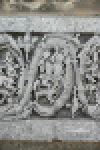

In [13]:
# The (100x75) examples in the pset are so small, and julia is so fast,
# we can manipulate these in real time
@manipulate for fn=filenames, x=1:100
    img = load("$fn.jpg")
    ImgFrame(carve(img,x))
end

In [14]:
# Stata takes a while to compute, it's worth precomputing and
# then displaying.  Note quantities are being recomputed each time
# unnecessarily when they could be reused.
# One can imagine a lower complexity computation.

if !isfile("Wfm_stata_center.jpg")
    run(`wget http://upload.wikimedia.org/wikipedia/commons/2/25/Wfm_stata_center.jpg`)
end
img = load("Wfm_stata_center.jpg")
#img = load("Lightning_hits_tree.jpg")

println("When we reach $(size(img,2)-1) we have carved the image down to 1 pixel wide:")



function process(img)

    A = [img]  

    for i=1:size(img,2)-1
    #for i=1:100 
        push!(A, carve(A[end]))
        if(rem(i,10)==0) || i==size(img,1)-1 print(i, " ")
        end
    end
    A
end
    



When we reach 663 we have carved the image down to 1 pixel wide:


process (generic function with 1 method)

In [15]:
#@profile process(img)


In [ ]:
@time A =  process(img);  # before view

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 

In [ ]:
@manipulate for image_width=1:size(img,1)
    ImgFrame(A[1+size(img,1)-image_width])
end

In [ ]:
@manipulate for i=1:100
    v[i]
end

In [ ]:
using Colors

In [ ]:
v = distinguishable_colors(100)

$$ x^5$$